In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras import regularizers
import keras_tuner as kt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.drop(['Serial No.'],axis=1,inplace=True)

In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
x_train, x_test ,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [10]:
scalar = MinMaxScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.fit_transform(x_test)

In [11]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [14]:
history = model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.1189 - val_loss: 0.0897
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0828 - val_loss: 0.0722
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0659 - val_loss: 0.0581
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0562 - val_loss: 0.0453
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0473 - val_loss: 0.0353
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0343 - val_loss: 0.0290
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0289 - val_loss: 0.0254
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0236 - val_loss: 0.0227
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0241 - val_loss: 0.0210
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0191 - val_loss: 0.0199
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0193 - val_loss: 0.0183
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

In [15]:
y_pred = model.predict(x_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [16]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7712422916990479

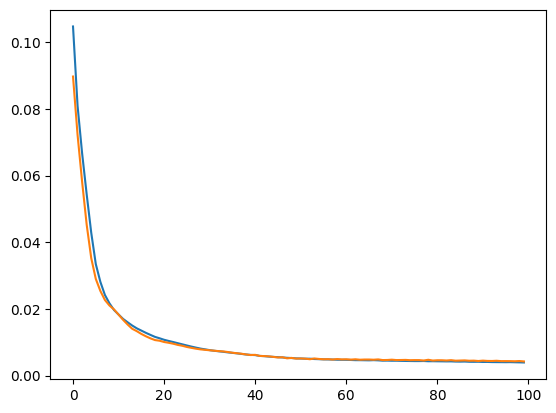

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [18]:
def build_model(hp):
    model = Sequential()

    # Hidden Layer 1
    units_1 = hp.Int("units_1", min_value=8, max_value=64, step=8)
    initializer_1 = hp.Choice("initializer_1", ['glorot_uniform', 'he_normal'])
    lambda_reg_1 = hp.Float("lambda_reg_1", min_value=0.0001, max_value=0.01, sampling='log')
    model.add(Dense(units=units_1,
                    kernel_initializer=initializer_1,
                    kernel_regularizer=regularizers.l2(lambda_reg_1),
                    input_dim=7))
    
    model.add(BatchNormalization())
    activation_1 = hp.Choice("activation_1", ['relu', 'tanh'])
    model.add(Activation(activation_1))
    dropout_rate_1 = hp.Float('dropout_1', min_value=0.0, max_value=0.4, step=0.1)
    model.add(Dropout(dropout_rate_1))

    # Hidden Layer 2
    units_2 = hp.Int("units_2", min_value=8, max_value=32, step=8)
    initializer_2 = hp.Choice("initializer_2", ['glorot_uniform', 'he_normal'])
    lambda_reg_2 = hp.Float("lambda_reg_2", min_value=0.0001, max_value=0.01, sampling='log')
    model.add(Dense(units=units_2,
                    kernel_initializer=initializer_2,
                    kernel_regularizer=regularizers.l2(lambda_reg_2)))
    
    model.add(BatchNormalization())
    activation_2 = hp.Choice("activation_2", ['relu', 'tanh'])
    model.add(Activation(activation_2))
    dropout_rate_2 = hp.Float('dropout_2', min_value=0.0, max_value=0.4, step=0.1)
    model.add(Dropout(dropout_rate_2))

    # Hidden Layer 3
    units_3 = hp.Int("units_3", min_value=8, max_value=16, step=8)
    initializer_3 = hp.Choice("initializer_3", ['glorot_uniform', 'he_normal'])
    lambda_reg_3 = hp.Float("lambda_reg_3", min_value=0.0001, max_value=0.01, sampling='log')
    model.add(Dense(units=units_3,
                    kernel_initializer=initializer_3,
                    kernel_regularizer=regularizers.l2(lambda_reg_3)))
    
    model.add(BatchNormalization())
    activation_3 = hp.Choice("activation_3", ['relu', 'tanh'])
    model.add(Activation(activation_3))
    dropout_rate_3 = hp.Float('dropout_3', min_value=0.0, max_value=0.4, step=0.1)
    model.add(Dropout(dropout_rate_3))

    # Output Layer for Regression
    model.add(Dense(units=1, activation='linear'))  # Linear output for regression

    # Optimizers
    optimizers_choice = hp.Choice("optimizer", ['adam', 'sgd', 'rmsprop'])
    learning_rate = hp.Float("learning_rate", min_value=0.0001, max_value=0.01, step=0.001)
    if optimizers_choice == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizers_choice == 'sgd':
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizers_choice == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)

    # Compile the model
    model.compile(loss='mean_squared_error',  # Regression loss
                  optimizer=optimizer,
                  metrics=['mae'])  # You can also add 'mse', 'mape', etc.

    return model

early_stop = EarlyStopping(monitor='val_loss', patience=5)

tuner = kt.RandomSearch(build_model,
                        max_trials=20,
                        objective="val_loss",
                        executions_per_trial=1,
                        directory='Results',
                        project_name="My_Project_Regression 1")

tuner.search(x_train, y_train,
             epochs=200,
             validation_data=(x_test, y_test),
             batch_size=32,
             verbose=2)

best_hyp = tuner.get_best_hyperparameters(1)[0]
print("Best Hyperparameters:\n")
print(best_hyp.values)

Trial 20 Complete [00h 00m 52s]
val_loss: 0.0231510978192091

Best val_loss So Far: 0.006448481697589159
Total elapsed time: 00h 16m 11s
Best Hyperparameters:

{'units_1': 64, 'initializer_1': 'he_normal', 'lambda_reg_1': 0.0002946172832313487, 'activation_1': 'relu', 'dropout_1': 0.0, 'units_2': 8, 'initializer_2': 'glorot_uniform', 'lambda_reg_2': 0.00015210043470696266, 'activation_2': 'tanh', 'dropout_2': 0.4, 'units_3': 8, 'initializer_3': 'glorot_uniform', 'lambda_reg_3': 0.007543309296844701, 'activation_3': 'relu', 'dropout_3': 0.0, 'optimizer': 'adam', 'learning_rate': 0.0081}


### Best Model from Tuner and save it

In [32]:
import os

os.makedirs("model", exist_ok=True)

In [19]:
# Get the best model from the tuner
best_model = tuner.get_best_models(num_models=1)[0]

# Save the model in HDF5 format
best_model.save("model/best_regression_model.h5")


### Predict on Test Data

### Predict using the model directly

In [20]:
# Predict on test data
predictions = best_model.predict(x_test)

# Show predictions
print("Predictions:\n", predictions[:10])  # Print first 10 predictions


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predictions:
 [[0.6627792 ]
 [0.7026626 ]
 [0.87807393]
 [0.7176015 ]
 [0.78165245]
 [0.6545882 ]
 [0.7083343 ]
 [0.7130311 ]
 [0.763898  ]
 [0.69914836]]


### Load and Predict later

In [21]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("model/best_regression_model.h5")

# Predict
predictions = model.predict(x_test)

print("Predictions:\n", predictions[:10])


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000012BC66DCFE0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predictions:
 [[0.6627792 ]
 [0.7026626 ]
 [0.87807393]
 [0.7176015 ]
 [0.78165245]
 [0.6545882 ]
 [0.7083343 ]
 [0.7130311 ]
 [0.763898  ]
 [0.69914836]]


### Evaluate on Test Data

In [23]:
loss, mae = best_model.evaluate(x_test, y_test)
print(f"Test MSE: {loss:.4f}, Test MAE: {mae:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0068 - mae: 0.0590 
Test MSE: 0.0064, Test MAE: 0.0579


### Save Model and scalar

In [24]:
# Save model
model.save("model/admission_model.h5")

# Save scaler
import joblib
joblib.dump(scalar, "model/scaler.pkl")


['model/scaler.pkl']